In [9]:
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

##  Use yfinance to Extract Tesla Stock Data

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [17]:
tesla = yf.Ticker("TSLA")

In [19]:
tesla_data = tesla.history(period="max")

In [21]:
tesla_data.reset_index(inplace=True)

In [23]:
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [27]:
import requests

In [31]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [33]:
html_data = requests.get(url).text
print(html_data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [35]:
soup = BeautifulSoup(html_data, 'html.parser')

In [37]:
tesla_revenue = pd.DataFrame(columns = ["Date", "Revenue"])

In [45]:
table = soup.find('table')

In [49]:
rows = table.find_all('tr')[1:]

In [66]:
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text

    revenue = revenue.replace('$', '').replace(',', '')
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

print(tesla_revenue.tail())

    Date Revenue
21  2013    2013
22  2012     413
23  2011     204
24  2010     117
25  2009     112


### Use yfinance to Extract Gamestop Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [70]:
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [72]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [74]:
Gamestop = yf.Ticker("GME")

In [76]:
gme_data = Gamestop.history(period="max")

In [78]:
gme_data.reset_index(inplace=True)

In [80]:
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [82]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [86]:
html_data_2 = requests.get(url).text
print(html_data_2)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

In [88]:
soup = BeautifulSoup(html_data_2, 'html.parser')

In [90]:
gme_revenue = pd.DataFrame(columns = ["Date", "Revenue"])

In [92]:
table = soup.find('table')

In [104]:
rows = soup.find_all("tr")

In [106]:
for row in soup.find("tbody").find_all('tr'):
    col = soup.find_all("td")
    date = col[0].text
    revenue = col[1].text

    revenue = revenue.replace('$', '').replace(',','')
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

print(gme_revenue.tail())

    Date Revenue
27  2020    6466
28  2020    6466
29  2020    6466
30  2020    6466
31  2020    6466


C:\Users\5004124025\AppData\Local\Temp\1\ipykernel_24428\1797374927.py:14: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\5004124025\AppData\Local\Temp\1\ipykernel_24428\1797374927.py:19: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



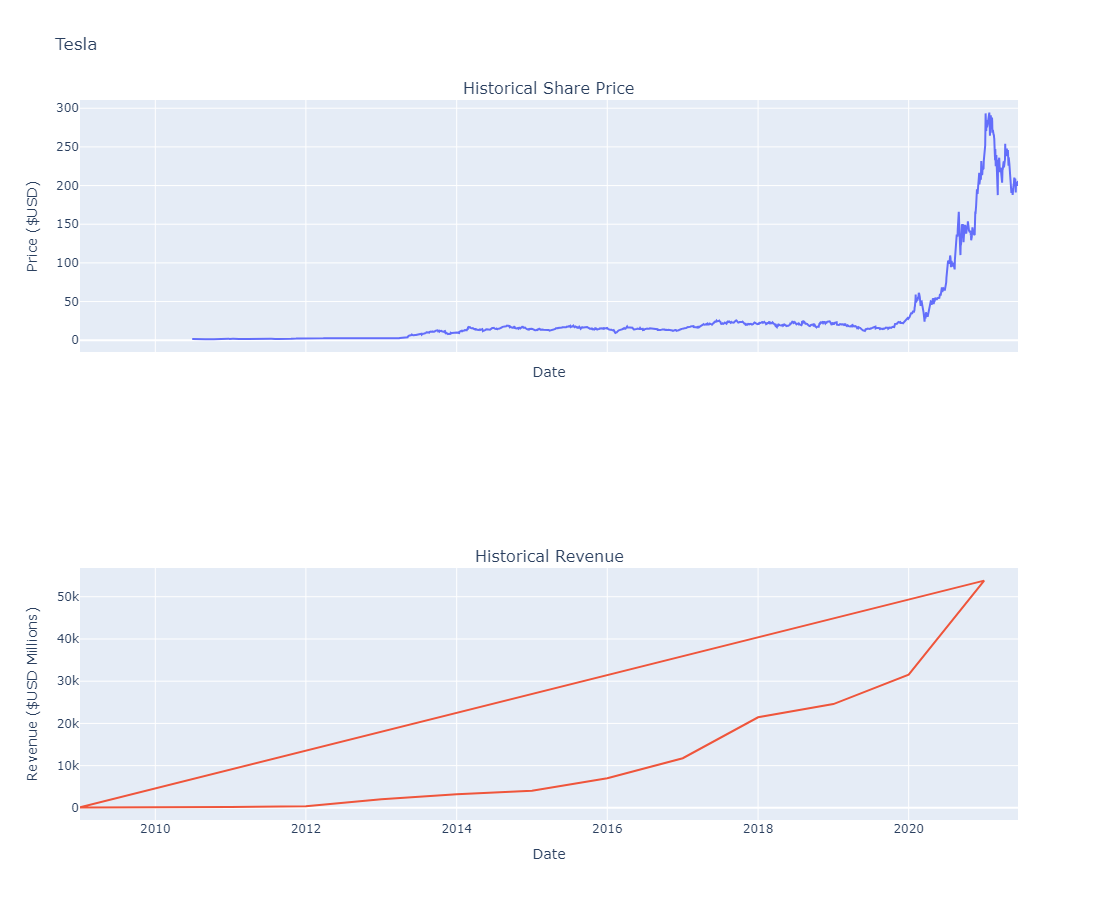

In [134]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd

def make_graph(stock_data, revenue_data, stock):
    
    stock_data_specific = stock_data[stock_data['Date'] <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-04-30']
    
   
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)
    
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific['Date'], infer_datetime_format=True), 
                             y=stock_data_specific['Close'].astype("float"), 
                             name="Share Price"), row=1, col=1)
    
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific['Date'], infer_datetime_format=True), 
                             y=revenue_data_specific['Revenue'].astype("float"), 
                             name="Revenue"), row=2, col=1)
    
   
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($USD)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($USD Millions)", row=2, col=1)
    
   
    fig.update_layout(
        showlegend=False,
        height=900,
        title=stock,
        xaxis_rangeslider_visible=False  
    )
    
    
    fig.show()

make_graph(tesla_data, tesla_revenue, "Tesla")


C:\Users\5004124025\AppData\Local\Temp\1\ipykernel_24428\742721341.py:14: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\5004124025\AppData\Local\Temp\1\ipykernel_24428\742721341.py:19: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



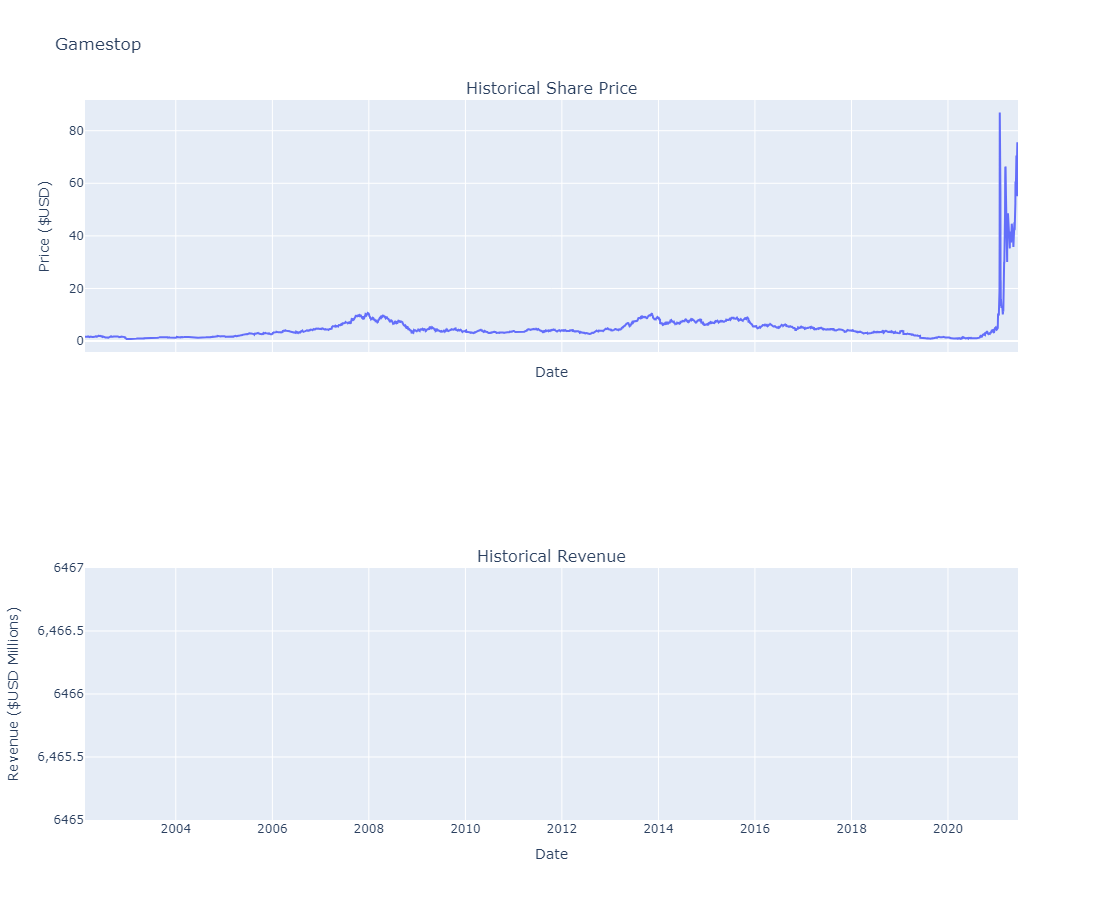

In [136]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd

def make_graph(stock_data, revenue_data, stock):
    
    stock_data_specific = stock_data[stock_data['Date'] <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-04-30']
    
   
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)
    
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific['Date'], infer_datetime_format=True), 
                             y=stock_data_specific['Close'].astype("float"), 
                             name="Share Price"), row=1, col=1)
    
   
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific['Date'], infer_datetime_format=True), 
                             y=revenue_data_specific['Revenue'].astype("float"), 
                             name="Revenue"), row=2, col=1)
    
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($USD)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($USD Millions)", row=2, col=1)
    
    
    fig.update_layout(
        showlegend=False,
        height=900,
        title=stock,
        xaxis_rangeslider_visible=False  
    )
    
   
    fig.show()


make_graph(gme_data, gme_revenue, "Gamestop")
